## Scratch Notebook for TS calculations

In [1]:
import sys

In [2]:
!{sys.executable} -m pip install -r requirements.txt

### Initialize

In [3]:
import time
import matplotlib.pyplot as plt
from inverse_thomson_scattering.v0 import form_factor as np_ff
from inverse_thomson_scattering.jax import form_factor as jnp_ff
from inverse_thomson_scattering.utils import plotting
import numpy as np
from scipy import special as sp

In [4]:
x = np.array(np.arange(-8, 8, 0.1))

# distf = 1 / (2 * np.pi) ** (1 / 2) * np.exp(-(x**5) / 2)
m = 2
const = np.sqrt(3*sp.gamma(3./m)/sp.gamma(5./m))
distf = np.exp(-(np.abs(x/const)**m))

norm = np.trapz(distf) * (x[2]-x[1])
distf = distf/norm

sa = np.linspace(55, 65, 10)
# backend = "jax"

In [5]:
# if backend == "numpy":
t0 = time.time()
formf, lams = np_ff.nonMaxwThomson(1.0, 1.0, 1.0, 1.0, 1.0, 0.3e20, 0.0, 0.0, [400, 700], 526.5, sa, distf, x)
t1 = time.time()
print(f"numpy/scipy form factor calculation {np.round(t1 - t0, 4)} s")

(40645,)
[5.05227108e-15 1.11879562e-14 2.45285529e-14 5.32414837e-14
 1.14415649e-13 2.43432053e-13 5.12775364e-13 1.06938379e-12
 2.20798996e-12 4.51354368e-12 9.13472041e-12 1.83033222e-11
 3.63096150e-11 7.13132812e-11 1.38667999e-10 2.66955661e-10
 5.08814028e-10 9.60143337e-10 1.79378391e-09 3.31788424e-09
 6.07588285e-09 1.10157636e-08 1.97731964e-08 3.51395509e-08
 6.18262050e-08 1.07697600e-07 1.85736184e-07 3.17134922e-07
 5.36103534e-07 8.97243516e-07 1.48671951e-06 2.43896075e-06
 3.96129909e-06 6.36982518e-06 1.01408521e-05 1.59837411e-05
 2.49424713e-05 3.85351967e-05 5.89430678e-05 8.92616572e-05
 1.33830226e-04 1.98655471e-04 2.91946926e-04 4.24780271e-04
 6.11901930e-04 8.72682695e-04 1.23221917e-03 1.72256894e-03
 2.38408820e-03 3.26681906e-03 4.43184841e-03 5.95253242e-03
 7.91545158e-03 1.04209348e-02 1.35829692e-02 1.75283005e-02
 2.23945303e-02 2.83270377e-02 3.54745928e-02 4.39835960e-02
 5.39909665e-02 6.56158148e-02 7.89501583e-02 9.40490774e-02
 1.10920835e-01

/home/avi/private/inverse-thomson-scattering/inverse_thomson_scattering/v0/ratintn.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  out[:, ~iflat] = rfn[:, ~iflat]


numpy/scipy form factor calculation 0.3799 s


In [6]:
# elif backend == "jax":
# get the functions
ff_fn, vg_ff_fn = jnp_ff.get_form_factor_fn([400, 700], 526.5)

# run them once so they're compiled
_ = ff_fn(1.0, 1.0, 1.0, 1.0, 1.0, 0.3e20, 0.0, 0.0, sa, (distf, x))
_ = vg_ff_fn(1.0, 1.0, 1.0, 1.0, 1.0, 0.3e20, 0.0, 0.0, sa, (distf, x))

# then run them again to benchmark them
# TODO: find a better way to measure this
t0 = time.time()
formf_jax, lams_jax = ff_fn(1.0, 1.0, 1.0, 1.0, 1.0, 0.3e20, 0.0, 0.0, sa, (distf, x))
t1 = time.time()
print(f"jax form factor calculation took {np.round(t1 - t0, 4)} s")

jax form factor calculation took 0.0763 s


In [7]:
t0 = time.time()
val, grad = vg_ff_fn(1.0, 1.0, 1.0, 1.0, 1.0, 0.3e20, 0.0, 0.0, sa, (distf, x))
t1 = time.time()
print(f"value and gradient took {np.round(t1 - t0, 4)} s")
print(f"gradient was {grad}")

value and gradient took 0.1367 s
gradient was 72329.25531709427


L2 norm between jax and np/sp is 4.171008884436038


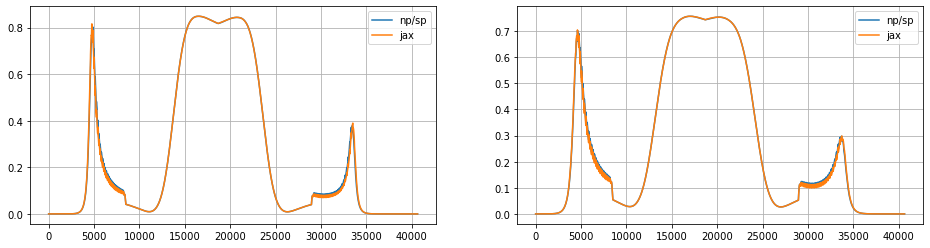

In [8]:
plotting.make_plots(formf, formf_jax)

In [9]:
formf_jax.shape

(1, 40645, 10)